# Traitement des données Julie

---

Julie est une petite fille belge née le 10 décembre 2006. Elle est la deuxième d’une famille de 3 enfants. Elle a un frère, Ulysse, de 15 mois son aîné, avec qui elle a une relation très complice et une petite sœur Philippine, de 3 ans sa cadette. 

Sa mère, Françoise Bourdoux, est othophoniste et son père ingénieur. Elle est filmée depuis l’âge de 10 mois, une heure par mois, en situation de jeux avec son frère ou seule. C'est une petite fille très spontanée qui aime s'exprimer, communiquer, raconter des histoires, mettre en scène des personnages ...

# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Julie :
* Ces fichiers sont placés dans un repertoire 'data/julie_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons converti en format .txt afin de pouvoir les traiter avec python

In [1]:
import os 
import pandas as pd 

print(os.getcwd())
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\julie_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

C:\Users\lamou\Desktop\MIASHS\TER_a


In [2]:
#listing

Nous avons 29 fichiers pour Julie, chacun de ses fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [3]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\julie_texte')

d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    #On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [4]:
data.shape

(69164, 6)

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [5]:
print(rows == len(data))

True


## Ordre des colonnes

In [6]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,JULIE,0_11_18,+div+,0.0,2780.0,div |
1,JULIE,0_11_18,FAT,0.0,4.0,la poule qui fait côt@o côt@o .
2,JULIE,0_11_18,act,NaN,NaN,"CHI est assise sur les genoux de FAT, ils rega..."
3,JULIE,0_11_18,FAT,4.0,5.0,côt@o côt@o .
4,JULIE,0_11_18,CHI,5.0,6.0,0 [=! petit bruit] 0 [=! tousse] .


## Création du fichier final format csv

In [7]:
# Création du fichier enfant
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data.to_csv('data_julie_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_julie_final.csv' pour l'exploration de données.

## Lecture fichier final

In [8]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data_child = pd.read_csv('data_julie_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_child = data_child.drop(columns = 'Unnamed: 0')

In [9]:
#data_child

# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [10]:
print(len(data_child['type'].unique()))

26


Il existe 26 types de ligne dans les fichiers Julie :

In [11]:
print(data_child['type'].unique())

['+div+' 'FAT' 'act' 'CHI' 'xpnt' 'MOT' 'pho' 'sit' 'com' 'add' 'int'
 'BRO' '-div-' 'OBS' 'GIR' 'gpx' 'nof' 'disc' 'BAB' 'HOU' 'UNK' 'VOI'
 'dis' '@EG::' 'SIS' 'SAM']


## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Julie s'exprime :
* Nous avons à disposition 16190 traductions pour Julie 
* On distingue les premiers mots d'Antoine à l'age de 11 mois et 18 jours
* Les traductions s'arrêtent à l'age de 5 ans 10 mois et 7 jours

In [12]:
pho_child = data_child[data_child['type'] == 'pho']
#pho_child

### Valeurs NaN

Il existe une valeur NaN dans la colonne contenu, nous allons la supprimer :

In [13]:
pho_child.loc[pho_child['contenu'].isna()]

,enfant,age,type,seconde_debut,seconde_fin,contenu
33295,JULIE,2_03_08,pho,NaN,NaN,NaN


In [14]:
#Supprime les valeurs NaN
pho_child = pho_child.dropna(subset=['type', 'contenu'])

Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_child['age'][0:1]`` nous donne le nombre d'année
* ``pho_child['age'][2:4]`` nous donne le nombre de mois
* ``pho_child['age'][5:7]`` nous donne le nombre de jours

In [15]:
# Ajout du nombre d'année
année_pho_child = pho_child.apply(lambda row: row['age'][0:1], axis=1)
pho_child['année'] = année_pho_child

# Ajout du nombre de mois
mois_pho_child = pho_child.apply(lambda row: row['age'][2:4], axis=1)
pho_child['mois'] = mois_pho_child

# Ajout du nombre de jour
jour_pho_child = pho_child.apply(lambda row: row['age'][5:7], axis=1)
pho_child['jour'] = jour_pho_child

In [16]:
#pho_child

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [17]:
nb_phrase_annee = pho_child[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
0,381
1,4509
2,6435
3,3631
4,733
5,500


In [18]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : Julie',
                       fontsize = 15,
                       use_index = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CECD971D0>],
      dtype=object)

On voit qu'il y a des quantités de données phonétiques différentes pour chaques années :
* Nous avons peut de données pour l'année zéro
* Nous avons beaucoup de données les première, deuxième et troisième année
* Il y a moins beaucoup moins de données la quatrième et cinquième année

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [19]:
nb_phrase_mois = pho_child[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                           \
mois         00     01      02     03     04     05     06     07     08   
année                                                                      
0           NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           NaN    NaN   370.0  603.0  603.0    NaN  585.0  756.0    NaN   
2         667.0  486.0   274.0  612.0  767.0  682.0  659.0  585.0  586.0   
3         679.0  580.0  1099.0    NaN  640.0    NaN    NaN  633.0    NaN   
4           NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN  733.0   
5           NaN    NaN     NaN  494.0    NaN    NaN    NaN    NaN    NaN   

                            
mois      09     10     11  
année                       
0        NaN    NaN  381.0  
1      625.0  522.0  445.0  
2      557.0    NaN  560.0  
3        NaN    NaN    NaN  
4        NaN    NaN    NaN  
5        NaN    6.0    NaN

Nous avons seulement 6 lignes pour l'age 5_10_xx

On voit aussi qu'il y a des mois sans données, cela vérifie qu'il y ait moins de données pour les années 0, 4 et 5 

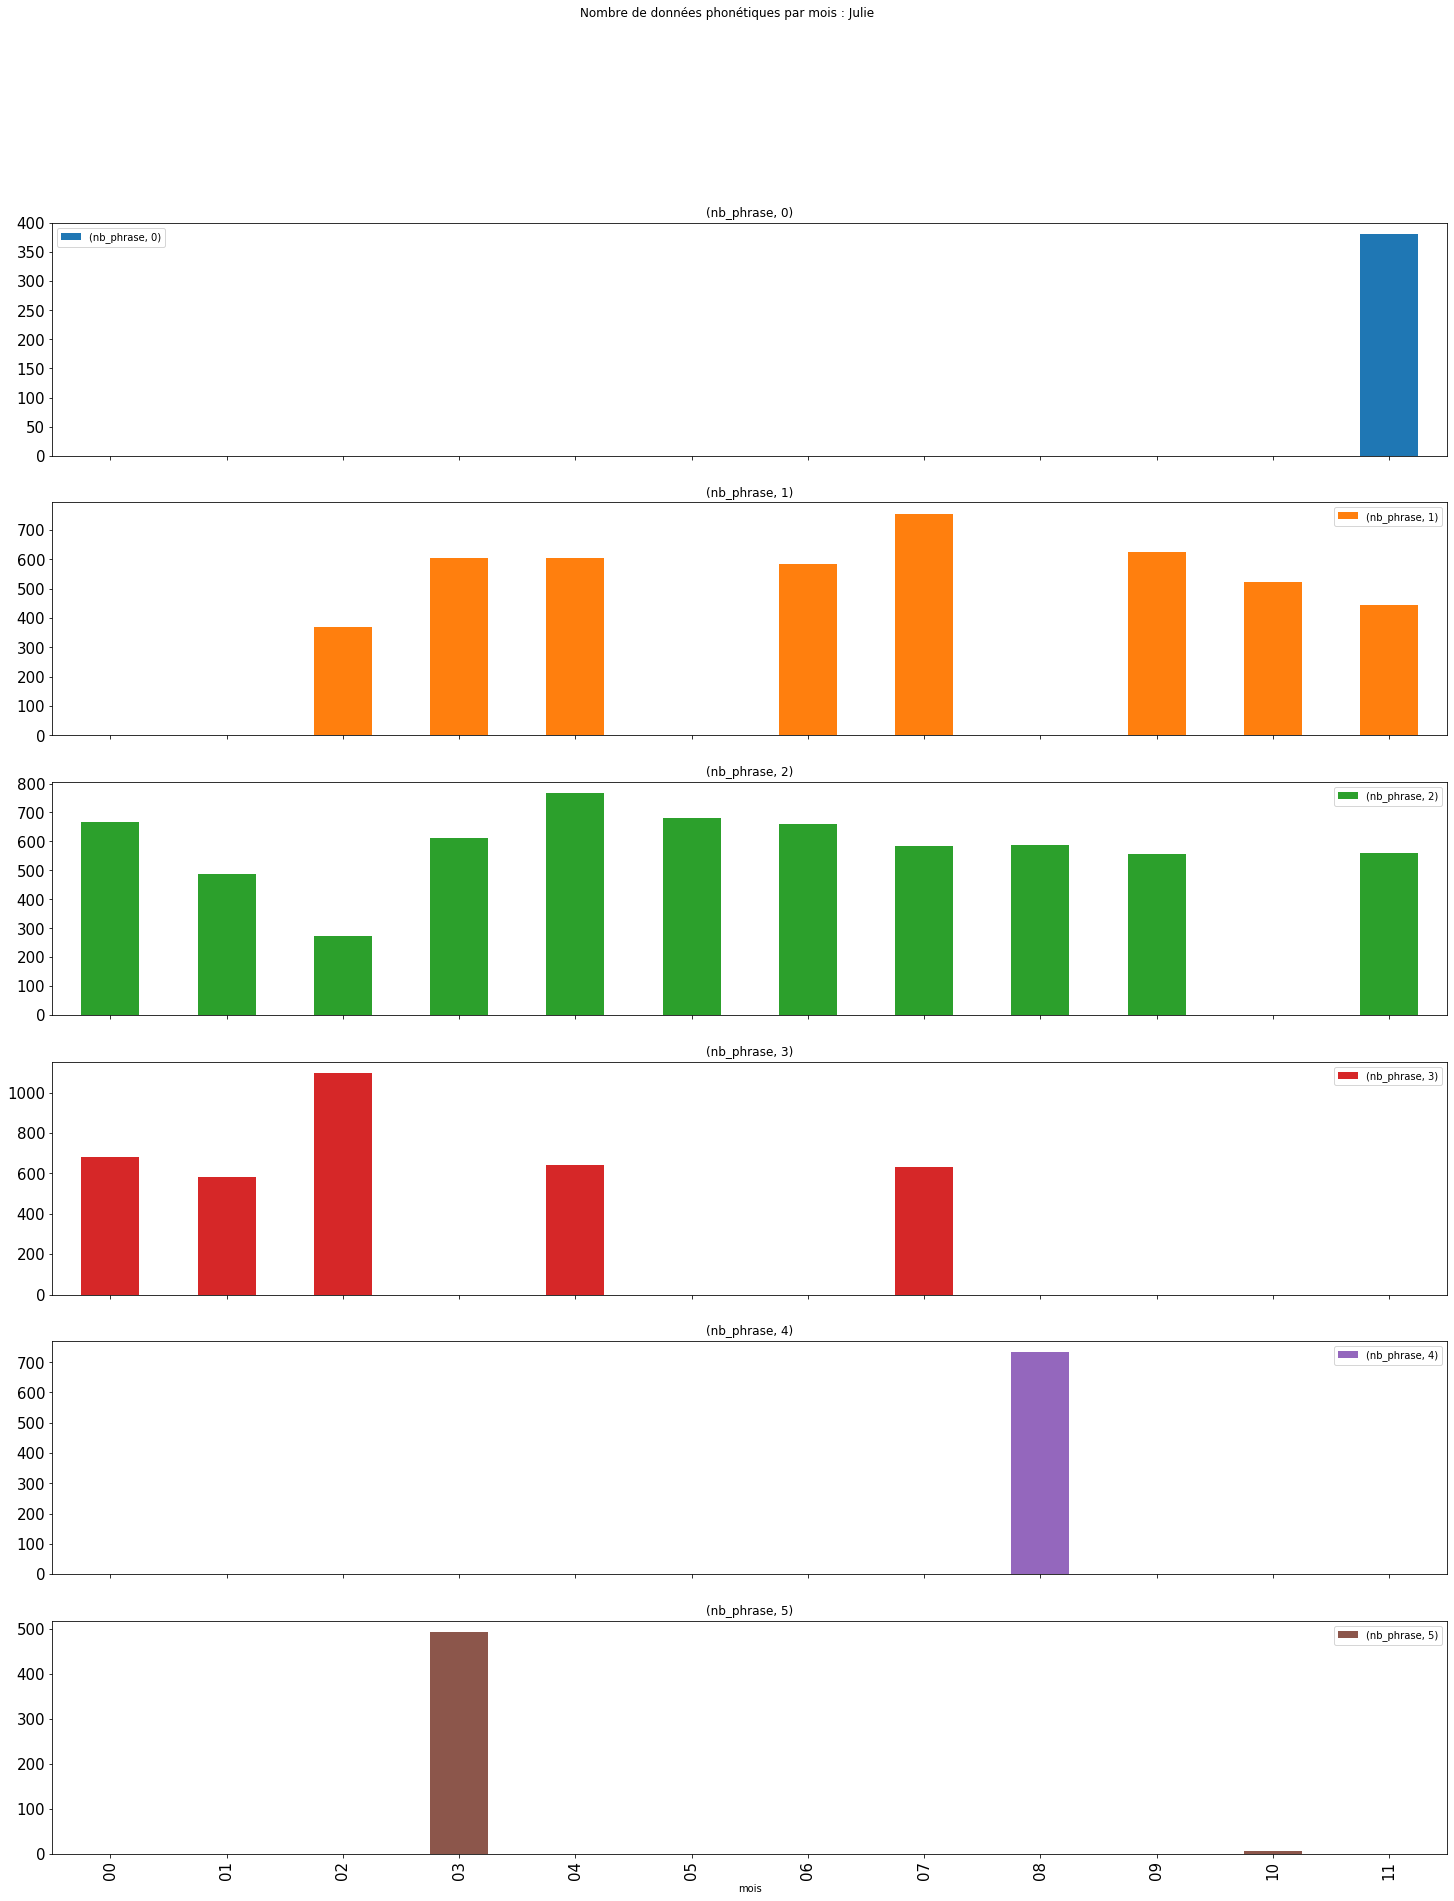

In [20]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Julie',
                                     fontsize = 15,
                                     use_index = True)

On voit qu'il y a moins d'enregistrements effectués sur Julie la troisième année et surtout sur les quatrième et cinquième année (en effet elles ne contiennent qu'un mois avec une quantité de données significative)

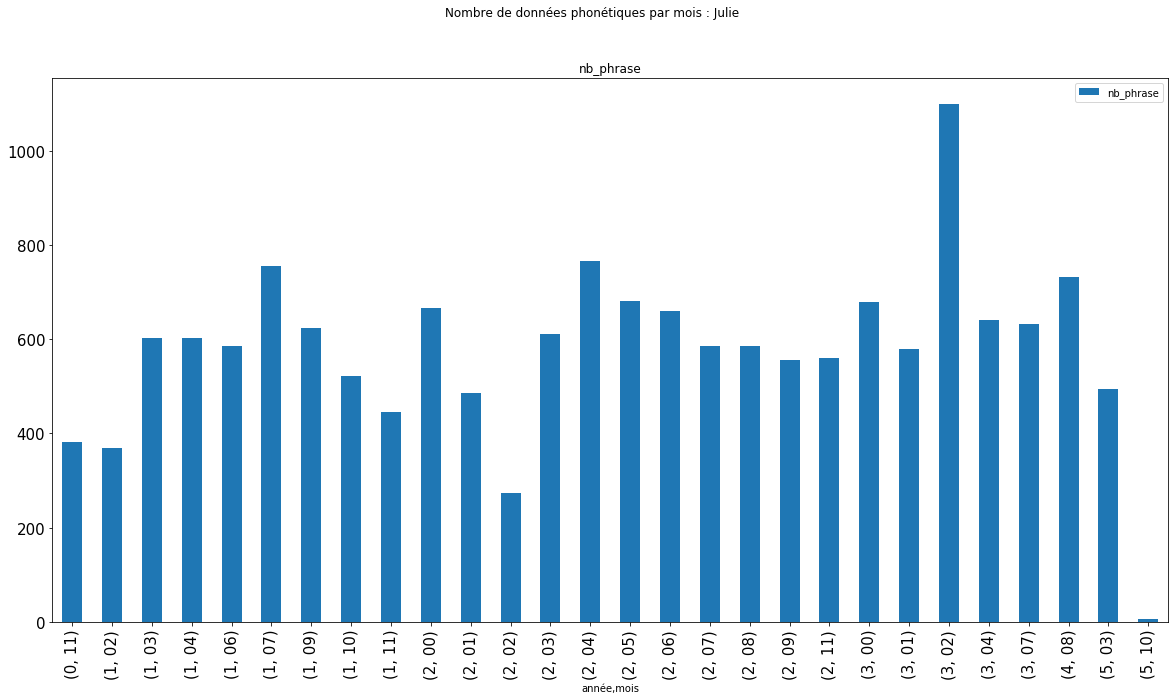

In [21]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Julie',
                    fontsize = 15,
                    use_index = True)

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [26]:
nb_phrase_jour = pho_child[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
#nb_phrase_jour

On voit qu'il n'y a aucun mois avec plus de un jour, il ne sert donc pas d'explorer plus loin ...

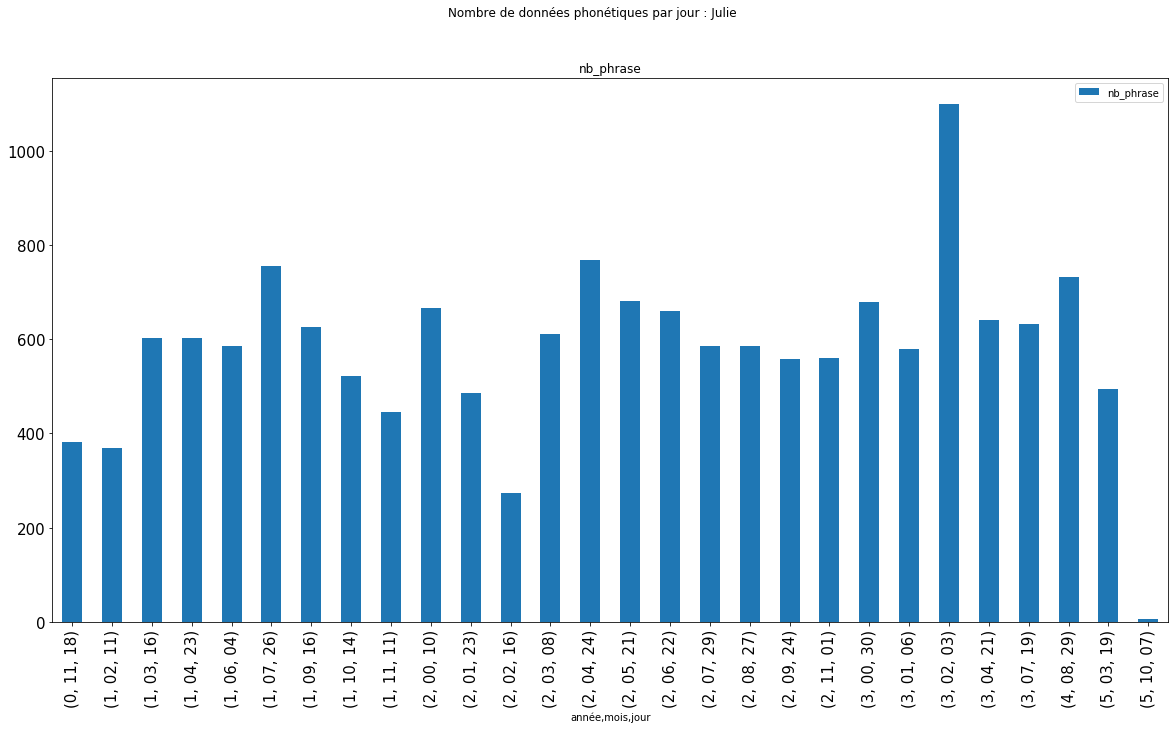

In [23]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Julie',
                    fontsize = 15,
                    use_index = True)

De cette manière on a une distribution plus homogène de la quantité de données phonétique. En effet nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque enregistrement de Julie. Mais elle n'est pas distribué de manière équitable dans le temps. On peut mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure). <br>
Pour cela nous devons ignorer les quantités pour les ages (car ces quantités ne sont pas représentatives et cela fausserais notre mesure):
* 5_10_07

On a maintenant une meilleure vision de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Julie.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [59]:
#pho_child

In [48]:
# Exemple 
pho = pho_child.at[68626, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "ʒə bː ʒə ʒə byvʁɛ mɔ̃ vɛʁ sː tu tɑ̃ nœ̃ ku : 12


Pour chaque ligne on calcul le nombre de mot phonétique :

In [28]:
nb_mot_pho = pho_child.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_child['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase de Julie avec le plus grand nombre de mot :

In [45]:
a = pho_child.loc[pho_child['nombre_mot_phonétique'] == pho_child['nombre_mot_phonétique'].max()].contenu.values
print(a)
print('longueur: '+str(str(a).count(' ')+1))

['wi ʒə l ɛ vy yn fwa yn fwa ʒə l ɛ deʒa vy yn fwa a la kʁɛʃ dɑ̃ la kuʁ de pəti kɑ̃ tɔ̃ netɛ dɑ̃ la kuʁ e e e ʒə l ɛ deʒa vy kɑ̃ ɛl pasɛ dɑ̃ avɛk œ̃̃ mus avɛk yn kopin']
longueur: 48


Voici la ligne de cette phrase :

In [46]:
pho_child.loc[pho_child['nombre_mot_phonétique'] == 48 ]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
65575,JULIE,5_03_19,pho,NaN,NaN,wi ʒə l ɛ vy yn fwa yn fwa ʒə l ɛ deʒa vy yn f...,5,03,19,48


### Espérance de mot par phrase

In [49]:
mean_nb_mot_pho_jour = pho_child[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_jour = mean_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CEDEB3898>],
      dtype=object)

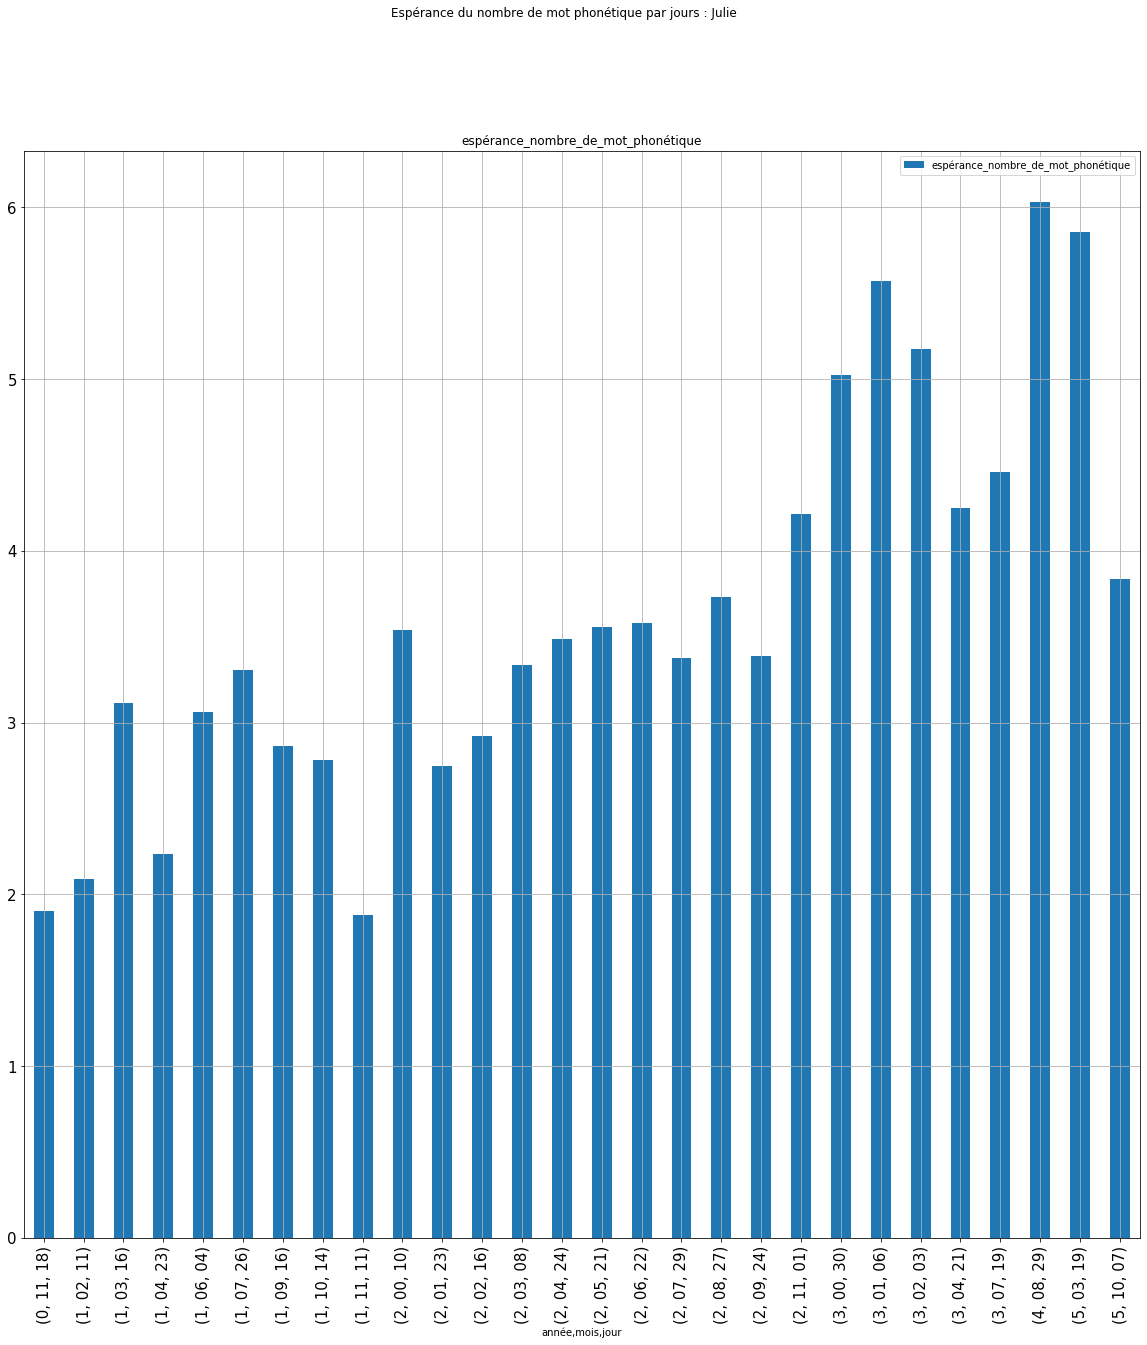

In [51]:
mean_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

* On constaste que l'espérance augmente en fonction du temps

### Variance du nombre de mot par phrase

In [64]:
var_nb_mot_pho_jour = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois', 'jour']).var()
var_nb_mot_pho_jour = var_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'variance'})
#var_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CEFF5AA90>],
      dtype=object)

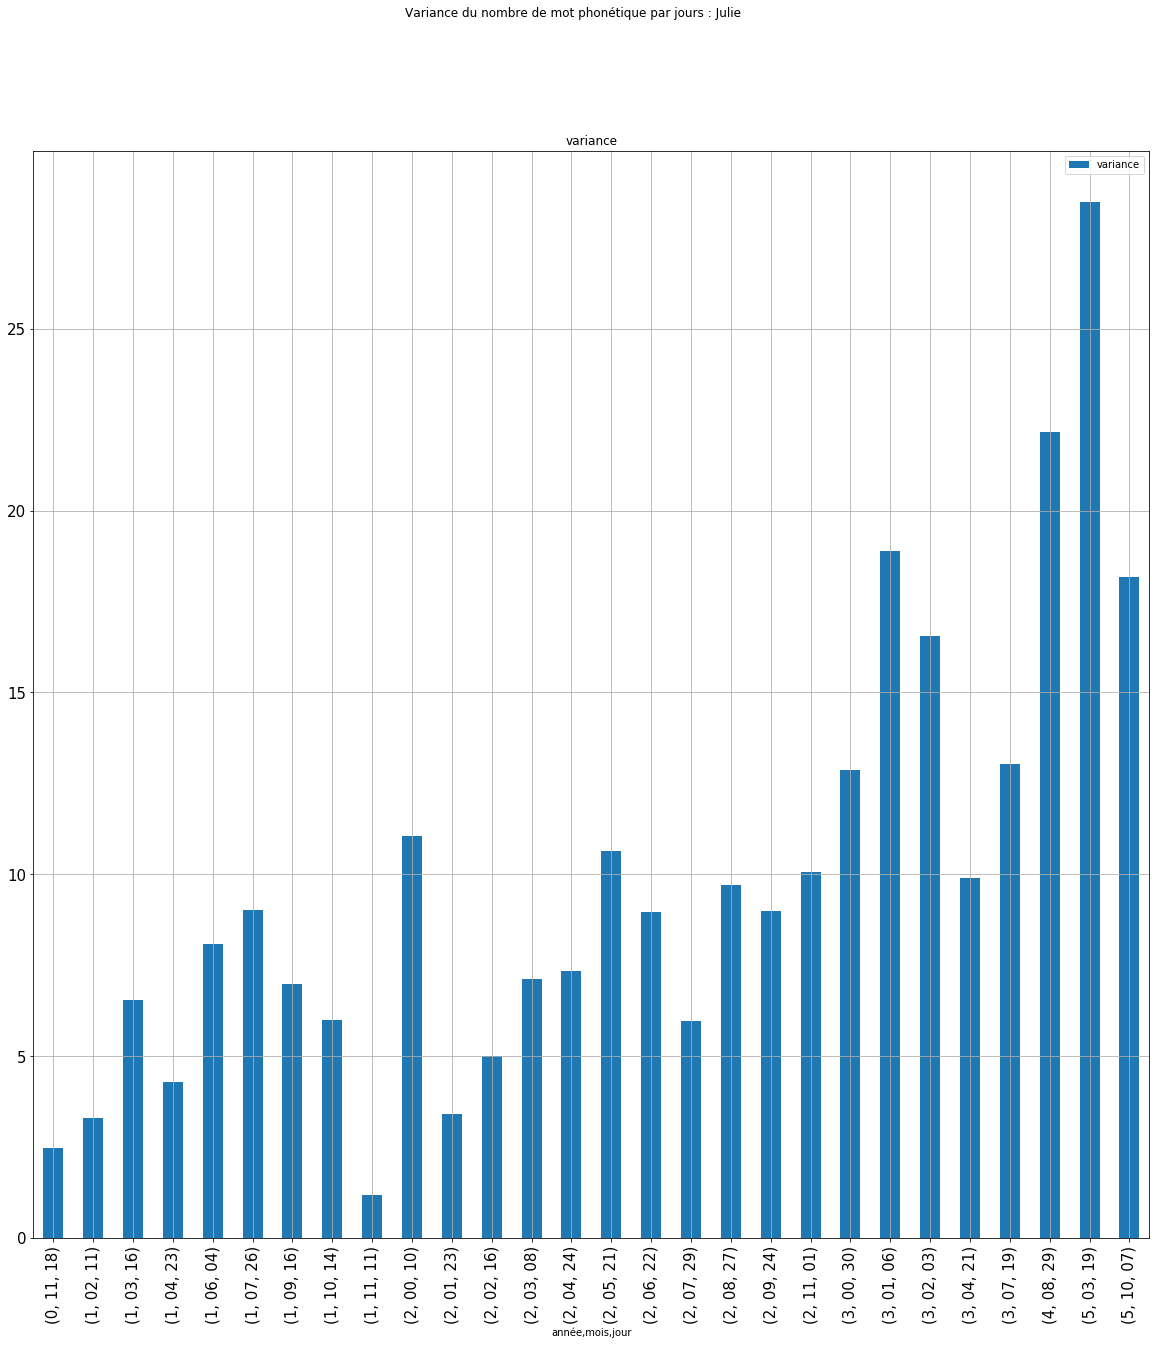

In [65]:
var_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Variance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

### Plus grande phrase 

In [66]:
max_mot_pho_child = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois','jour']).max()
max_mot_pho_child = max_mot_pho_child.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
#max_mot_pho_child

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CF206A9B0>],
      dtype=object)

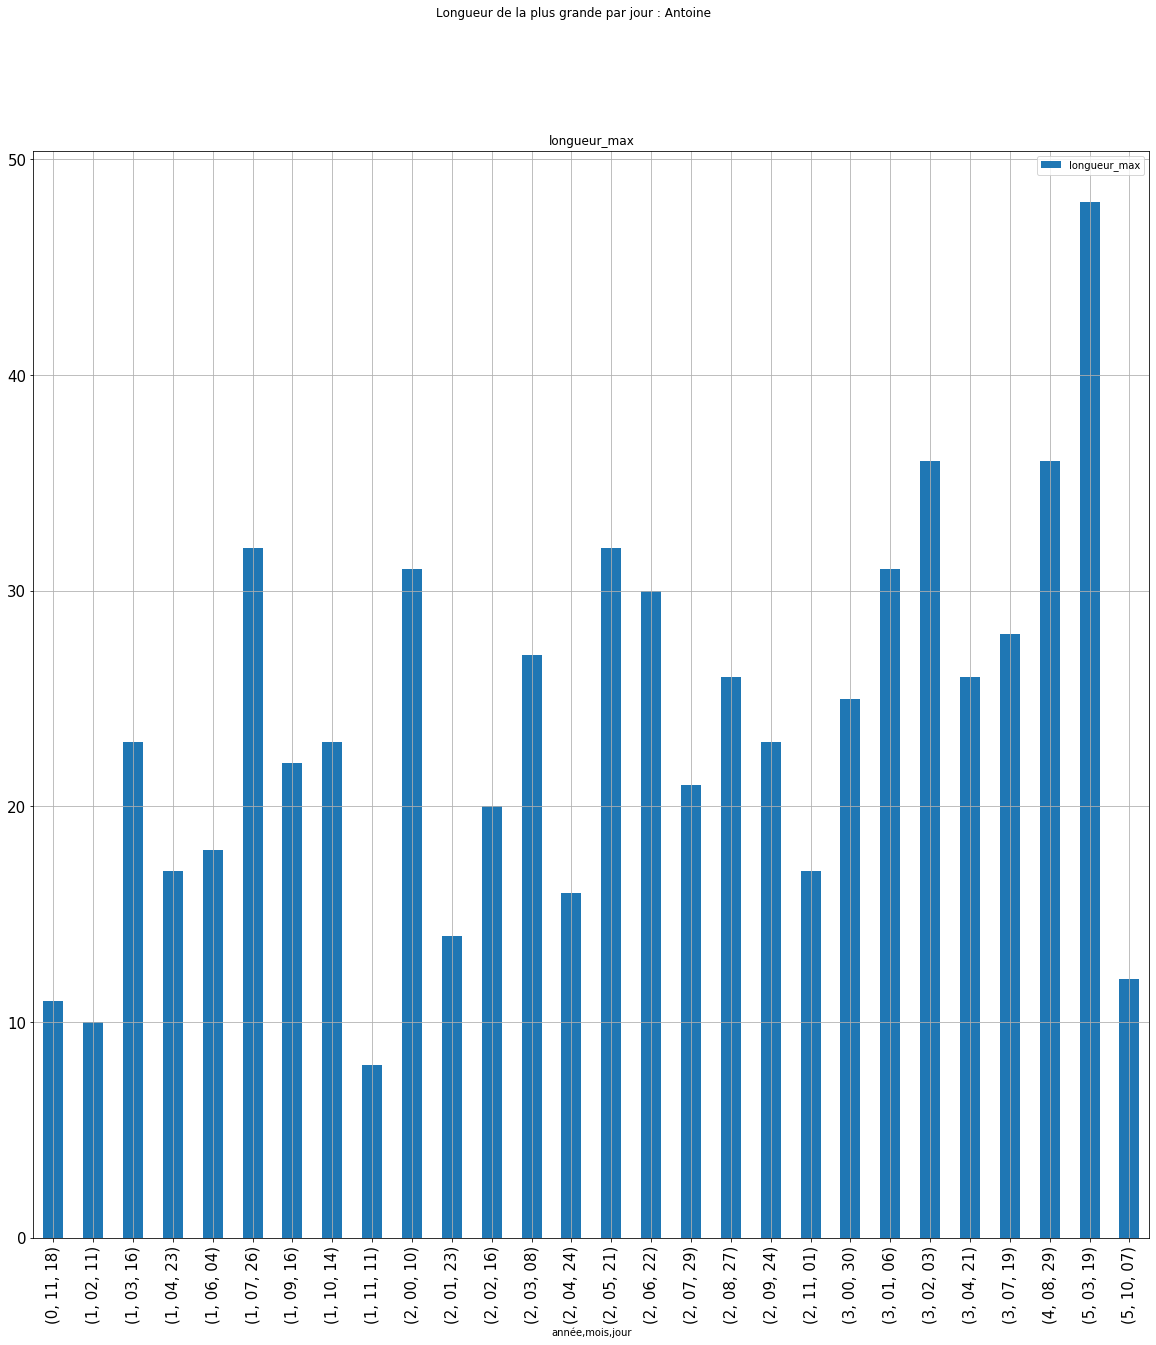

In [67]:
max_mot_pho_child.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Antoine',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

On voit que Julie la plus grande phrase de Julie pour l'enregistrement à l'age 1,11,11 est la valeur la plus faible pour tous les enregistrements

In [73]:
#Exemple: selection des phrases de 12 mots à l'age 1,xx,xx
pho_child.loc[pho_child['année'] == '1'].loc[pho_child.loc[pho_child['année'] == '1']['nombre_mot_phonétique'] == 12]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
5448,JULIE,1_03_16,pho,NaN,NaN,sɛ dɛ a sɛ sa sɛ sɛ puʁ zəte tu lɛ kyb,1,03,16,12
5623,JULIE,1_03_16,pho,NaN,NaN,lə məsjø il ɛ paʁti avɛk sa ʁəmɔʁk e e sa kamj...,1,03,16,12
5728,JULIE,1_03_16,pho,NaN,NaN,papa ɛ ta ɛ tale fɛʁ lɛ kuʁs puʁ ate dɛ pekylos,1,03,16,12
6155,JULIE,1_03_16,pho,NaN,NaN,zə mɛ dɑ̃ l bak kɔm sa zyli pø pa lɛ pʁɑ̃d,1,03,16,12
8195,JULIE,1_04_23,pho,NaN,NaN,sa sɛ dɛ ʁːɑ̃ bwa kə zum sɛ pa dɛ ʁɑ̃ bwa,1,04,23,12
10651,JULIE,1_06_04,pho,NaN,NaN,z e kase puʁ sa pastə zə vudɛ bjɛ̃ mɛt syʁ la,1,06,04,12
10902,JULIE,1_06_04,pho,NaN,NaN,apʁɛ kɑ̃ z e mi dø tʁyk la zə fe lə twa,1,06,04,12
11619,JULIE,1_06_04,pho,NaN,NaN,e me zə təs zə t asyʁ kə ve mɛt lə twa,1,06,04,12
11729,JULIE,1_06_04,pho,NaN,NaN,mwa z e tʁuve dɛ zelastik puʁ gaʁsɔ̃ e dɛ puʁ ...,1,06,04,12
12790,JULIE,1_07_26,pho,NaN,NaN,l ɛ paʁti ale ʁavaje ot paʁ ɔ̃t ɔ̃ va ale vwaʁ,1,07,26,12


### Gestion de l'encodage

In [ ]:
import chardet

with open('data_antoine_final.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

result

In [ ]:
#data_antoine_final = pd.read_csv('data_antoine_final.csv', encoding=result['encoding'])
#data_antoine_final